# Data Exploration
this file is used to get an overview over the files, that are on the IMI server. Included .csv files are loaded and used to determine which probands can be used.

In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from utils.plotting import overlaySegment
import pandas as pd

import torch

In [2]:
# files are located here
path_to_data = "/share/data_ultraschall/compressions"

In [3]:
len(os.listdir(path_to_data))

2194

In [4]:
# manually, but somewhat random selected to see the image quality
test_dir = os.path.join(path_to_data, "31")
test_dir

'/share/data_ultraschall/compressions/31'

In [5]:
# get two random images 
random_frames = np.random.choice(os.listdir(os.path.join(test_dir,"frames")), 2)
random_frames

array(['image_0049.png', 'image_0044.png'], dtype='<U14')

In [6]:
# load images and segmentations
img_1 = Image.open(os.path.join(test_dir,"frames",random_frames[0]))
img_2 = Image.open(os.path.join(test_dir,"frames",random_frames[1]))

seg_1 = Image.open(os.path.join(test_dir,"segmentations","1",random_frames[0]))
seg_2 = Image.open(os.path.join(test_dir,"segmentations","1",random_frames[1]))

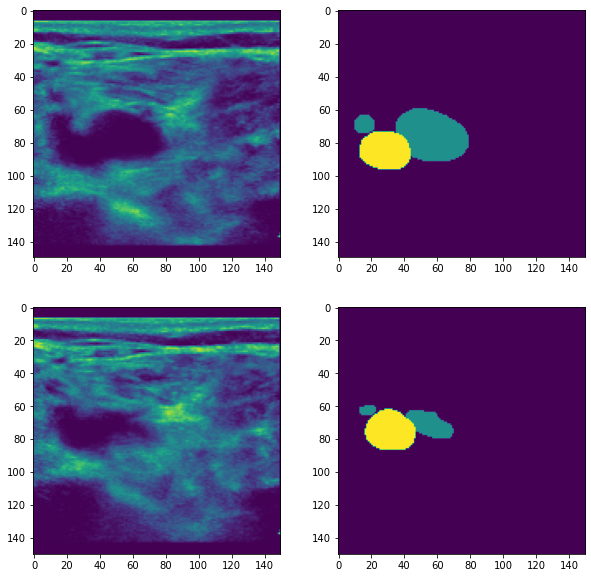

In [7]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img_1)
plt.subplot(222)
plt.imshow(seg_1)
plt.subplot(223)
plt.imshow(img_2)
plt.subplot(224)
plt.imshow(seg_2)

In [8]:
# images need to be normalized
print(np.array(img_1).max())

# segmentations have labels of 0,1,2 and will be divided by 100
print(np.array(seg_1).max())

245
200


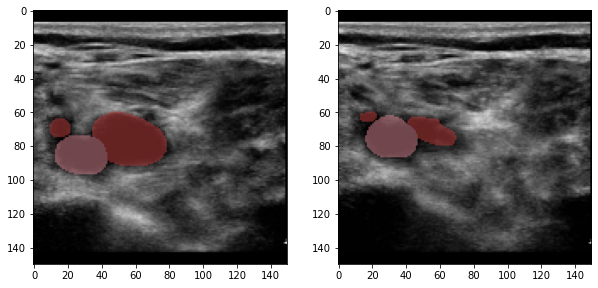

In [9]:
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(overlaySegment(torch.from_numpy(np.array(img_1))/255,torch.from_numpy(np.array(seg_1))/100))
plt.subplot(122)
plt.imshow(overlaySegment(torch.from_numpy(np.array(img_2))/255,torch.from_numpy(np.array(seg_2))/100))

In order to get the right label for the segmentation, we need to divide the seg image by 100, as the labels are read in as 0, 100, and 200. the image needs to be devided by 255 to get float numbers

# Plotting from randomly from all folders
there ar around 3000 recordings and about 250.000 images with segmentations. There will need to be a selection of images taken. Maybe 1500 or 2000 images and segmentations overall. The distribution of the three markers should be 1/3 for each scan location. For this we need an overview over the different recordings. This is included in the quality.csv and sequences.csv files in the cocoAi filder...

In [10]:
# load the quality overview
quality = pd.read_csv("~/quality.csv")

# More info about the sequences
sequences = pd.read_csv("~/sequences.csv")

In [11]:
quality

,ID,Vessel in Frame,LM configuration,Vein contrast/cropping error,Artery contrast,Vein boundary,Artery boundary,Gain,Depth,Artefacts,Movement,Total
0,113.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,17
1,116.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,11
2,119.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,12
3,120.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,16
4,121.0,1.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
4762,11276.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,17
4763,11277.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,14
4764,11278.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,16
4765,11280.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,12


In [12]:
sequences

,Id,Patient,Device,Leg,Anatomy,Landmark,Datatype
0,1,1,guys,RT,SFV1,LM5,healthy
1,2,1,guys,RT,SFV2,LM6,healthy
2,3,1,guys,LT,CFV / GSV + SFA / PFA,LM3,healthy
3,4,1,guys,LT,SFV1,LM5,healthy
4,5,1,guys,LT,SFV2,LM6,healthy
...,...,...,...,...,...,...,...
3862,5396,228,philips,LT,GSV / CFV + SFA / PFA,"LM1,LM3",healthy
3863,5397,224,philips,RT,POPV,LM8,healthy
3864,5682,280,philips,RT,SFV + SFA,LM6,healthy
3865,5687,282,philips,RT,SFV + SFA,LM6,healthy


In [13]:
# somewhat even
sequences['Leg'].value_counts()

RT    2149
LT    1598
Name: Leg, dtype: int64

There are some things, that need to be fulfilled in orer for the sequence to be used for training. The table below sums up all the different Columns and what needs to be fulfilled in order to use the ID for the training

| Quality Description | useable Index | Description |
|---|---|---|
|Vessel boundary| 1,2| Vessel partially cut of or fully visible during frames|
|LM configuration| 1,2| Landmarks are somewhat present for flow estimation|
|Vein contrast| 1,2 | some loss of contrast, but still visible|
|Artery contrast| 1,2 | some loss of contrast, but stil visible|
|shaprnes of Vein boundaries| 1,2 | up until poorly visible boundaries, We try to learn the overall flow|
|shaprnes of artery boundaries| 1,2 | up until poorly visible boundaries, We try to learn the overall flow|
|Overall gain| 1 | only good images are taken. Not too bright or too dark|
|artefacts| 1,2 | some aftefacts are present in the some frames|
| Movement Sequence| 1,2| Exclude "lot's" of movement for now. The other indicate some slow or fast compression of the vein|

In [14]:
# filter based on the table above
useable = quality[
    (quality["Vessel in Frame"] <3) &
    (quality['LM configuration'] < 4) &
    (quality['Vein contrast/cropping error'] < 3) &
    (quality['Artery contrast'] < 3) &
    (quality['Vein boundary'] < 3) &
    (quality['Artery boundary'] < 3) &
    (quality['Gain'] == 1) &
    (quality['Artefacts'] < 3) &
    (quality['Movement'] < 3) &
    (quality['Total'] < 21)
]
useable

,ID,Vessel in Frame,LM configuration,Vein contrast/cropping error,Artery contrast,Vein boundary,Artery boundary,Gain,Depth,Artefacts,Movement,Total
0,113.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,17
1,116.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,11
2,119.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,12
3,120.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,16
5,124.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
4754,11243.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,13
4755,11246.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,15
4761,11274.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,13
4763,11277.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,14


Using the indices in the table mentioned above, 1838 example IDs can be used.

So a good option might be to randomly select two images and then use these as fixed. The moving part is then selected by used the image ID and selecting the image, that comes 4 frames after the fixed image.

It is of importance that IDs used for testing and training are not present in the evalutaiton section!

In [15]:
# filter based on useable
overview = sequences[sequences.Id.isin(useable.index.tolist())]
overview

,Id,Patient,Device,Leg,Anatomy,Landmark,Datatype
0,1,1,guys,RT,SFV1,LM5,healthy
1,2,1,guys,RT,SFV2,LM6,healthy
2,3,1,guys,LT,CFV / GSV + SFA / PFA,LM3,healthy
4,5,1,guys,LT,SFV2,LM6,healthy
5,6,1,guys,RT,POP-TRUNK,LM9,healthy
...,...,...,...,...,...,...,...
3265,4754,343,philips,RT,SFV + SFA,LM7,healthy
3266,4755,343,philips,RT,SFV + SFA,LM7,healthy
3272,4761,343,philips,RT,POPV,LM8,not closing
3274,4763,343,philips,RT,POPV,LM8,invalid compression


In [16]:
# Check how many of the selected IDs are available as data
overview_clean = overview[overview['Id'].astype(str).isin(os.listdir(path_to_data))]
overview_clean

,Id,Patient,Device,Leg,Anatomy,Landmark,Datatype
2,3,1,guys,LT,CFV / GSV + SFA / PFA,LM3,healthy
8,9,2,guys,RT,SFV1,LM5,healthy
9,10,2,guys,RT,SFV2,LM6,healthy
18,19,3,guys,LT,CFV,LM3,healthy
19,20,3,guys,LT,SFV1,LM5,healthy
...,...,...,...,...,...,...,...
3259,4748,343,philips,RT,SFV + SFA,LM6,healthy
3260,4749,343,philips,RT,POPV,LM8,healthy
3263,4752,343,philips,RT,POPV,LM8,healthy
3265,4754,343,philips,RT,SFV + SFA,LM7,healthy


In [17]:
# get an overview. all seems to be fine.
print(overview_clean['Leg'].value_counts())
print(overview_clean['Device'].value_counts())
print(overview_clean['Datatype'].value_counts())

RT    373
LT    291
Name: Leg, dtype: int64
clarius       322
philips       234
clarius-hd     84
guys           46
georges         4
Name: Device, dtype: int64
healthy                509
not closing             69
invalid compression     53
background              41
compression 2            7
sliding                  5
compression 3            3
pathological             2
compression 1            1
Name: Datatype, dtype: int64


In [18]:
# Are all IDs available as segmented data?
available_seg = []
for proband in overview_clean['Id'].values:
    proband_path = os.path.join(path_to_data,str(proband))
    if "segmentations" in os.listdir(proband_path):
        available_seg.append(proband)
len(available_seg)

475

In [19]:
# filter based on segmentation available
overview_available = overview_clean[overview_clean['Id'].isin(available_seg)]
overview_available

,Id,Patient,Device,Leg,Anatomy,Landmark,Datatype
2,3,1,guys,LT,CFV / GSV + SFA / PFA,LM3,healthy
8,9,2,guys,RT,SFV1,LM5,healthy
9,10,2,guys,RT,SFV2,LM6,healthy
19,20,3,guys,LT,SFV1,LM5,healthy
24,25,4,guys,RT,SFV1,LM5,healthy
...,...,...,...,...,...,...,...
2734,4186,296,clarius-hd,RT,BACKGROUND,BACKGROUND,background
2783,4242,300,clarius-hd,RT,BACKGROUND,BACKGROUND,background
2833,4300,304,clarius-hd,RT,BACKGROUND,BACKGROUND,background
2862,4333,306,clarius-hd,RT,BACKGROUND,BACKGROUND,background


In [20]:
# sest random seed so we can come back and examine the data
np.random.seed(42)

In [21]:
# choose 4 to visualize
random_selected_ids = np.random.choice(overview_available['Id'].values, size=6)
random_selected_ids

array([ 516, 3507, 2468, 1605,  528,  298])

In [22]:
# simple function to make the plotting easier
def create_plots(img_path, seg_path):
    img = Image.open(img_path)#/255 # normalize
    seg = Image.open(seg_path)#/100 # create labels
    
    return overlaySegment(torch.from_numpy(np.array(img))/255,torch.from_numpy(np.array(seg))/100)

In [23]:
plots = []
for proband in random_selected_ids:
    proband_path = os.path.join(path_to_data,str(proband))
    
    # sort all images, to select fixed and moving image
    # the fixed will be randomly selected
    # and the moving will be X images further or before
    all_files = sorted(os.listdir(os.path.join(proband_path,"frames")))
    rand_idx = np.random.randint(0,len(all_files), size=2)
    file_idx = []
    for idx in rand_idx:
        
        # The time intervall atm is 4 images
        moving_idx = idx + 4
        if moving_idx > len(all_files)-1:
            moving_idx = idx - 4
            if moving_idx < 0:
                moving_idx = 0

        file_idx.append([all_files[idx],all_files[moving_idx]])
        
    plots.append([
        create_plots(os.path.join(proband_path,"frames",file_idx[0][0]),
                    os.path.join(proband_path,"segmentations","1",file_idx[0][0])),
        create_plots(os.path.join(proband_path,"frames",file_idx[0][1]),
                    os.path.join(proband_path,"segmentations","1",file_idx[0][1]))
    ])
        

# Visualizations

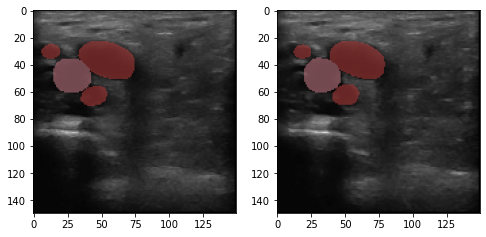

In [24]:
fig = plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(plots[0][0])
plt.subplot(122)
plt.imshow(plots[0][1])

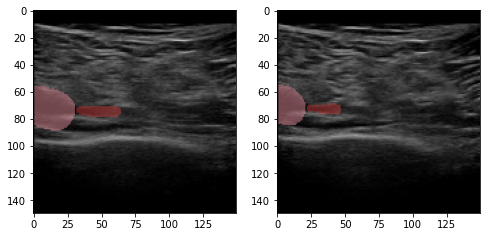

In [25]:
fig = plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(plots[1][0])
plt.subplot(122)
plt.imshow(plots[1][1])

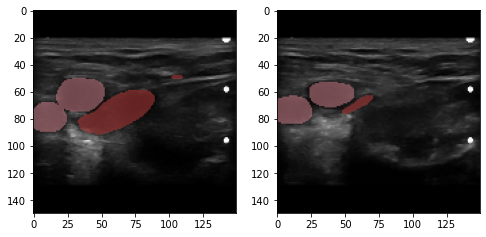

In [26]:
fig = plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(plots[2][0])
plt.subplot(122)
plt.imshow(plots[2][1])

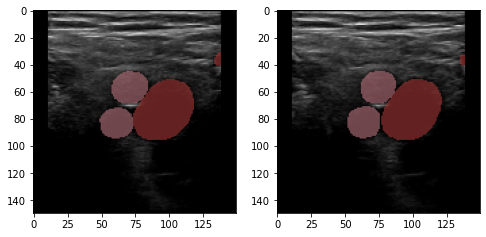

In [27]:
fig = plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(plots[3][0])
plt.subplot(122)
plt.imshow(plots[3][1])

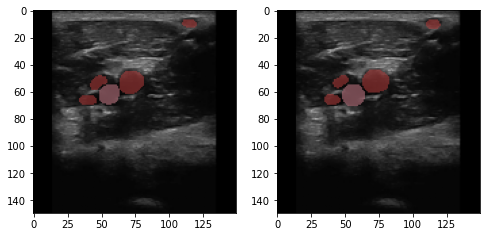

In [28]:
fig = plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(plots[4][0])
plt.subplot(122)
plt.imshow(plots[4][1])

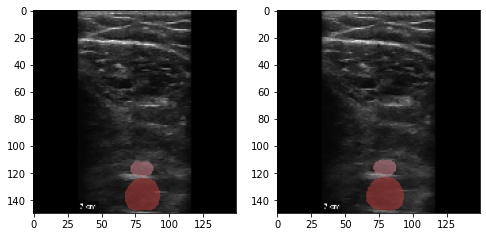

In [29]:
fig = plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(plots[5][0])
plt.subplot(122)
plt.imshow(plots[5][1])

# Processing
Next step is to load all images and save them in a .pth file, to load them later. This will be done in the US_data_processing file

In [30]:
overview_available.to_csv("~/available_US_probands.csv")